In [2]:
#IMPORT LIBRARIES 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
#CREATE DATASET OF NEXT GENERATION SEQUENCING
a= np.random.seed(50)

number_reads=1000

data = { 
    "Read_ID":[f"Read_{i}" for i in range(1,number_reads +1)],
    "Average_Quality": np.random.normal(loc=30,scale=5,size=number_reads),
    "GC_Content": np.random.normal(loc=50, scale=10, size=number_reads),
    "Read_Length": np.random.randint(50, 161, size=number_reads)  
}
df=pd.DataFrame(data)

df["Average_Quality"] = df["Average_Quality"].clip(10,50)
df["GC_Content"] = df["GC_Content"].clip(20,90)

In [4]:
# VIEWING DATASET

print("Sample Dataset Preview of NGS: ")
print(df.head())

print("Sample dataset summary:")
print(df.describe())

Sample Dataset Preview of NGS: 
  Read_ID  Average_Quality  GC_Content  Read_Length
0  Read_1        22.198239   70.836074           57
1  Read_2        29.845112   82.061773          117
2  Read_3        26.895358   48.100661          133
3  Read_4        22.677098   55.311739          114
4  Read_5        37.059731   27.669963           62
Sample dataset summary:
       Average_Quality   GC_Content  Read_Length
count      1000.000000  1000.000000   1000.00000
mean         29.881958    50.176547    104.30800
std           5.020057    10.098509     31.87204
min          10.950548    20.000000     50.00000
25%          26.518470    43.107736     77.00000
50%          29.901220    50.402321    104.00000
75%          33.331825    57.240877    131.00000
max          46.570377    82.061773    160.00000


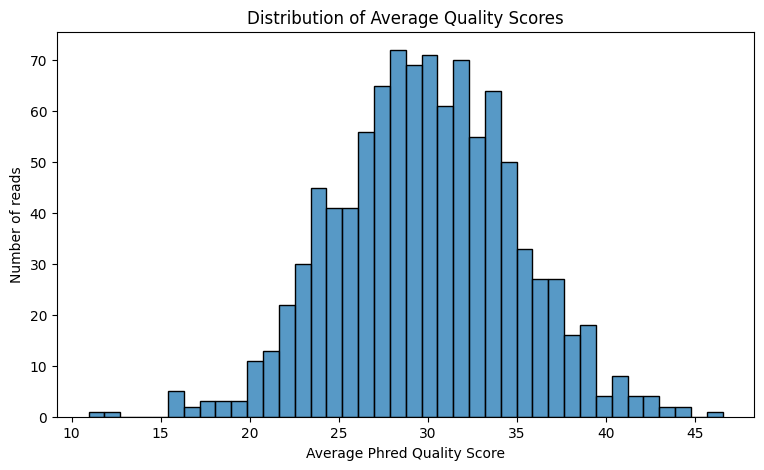

In [5]:
# VISUALIZATION OF QULAITY SCORE 
plt.figure(figsize=(9,5))
sns.histplot(df["Average_Quality"], bins=40)
plt.title("Distribution of Average Quality Scores")
plt.xlabel("Average Phred Quality Score")
plt.ylabel("Number of reads")
plt.show()




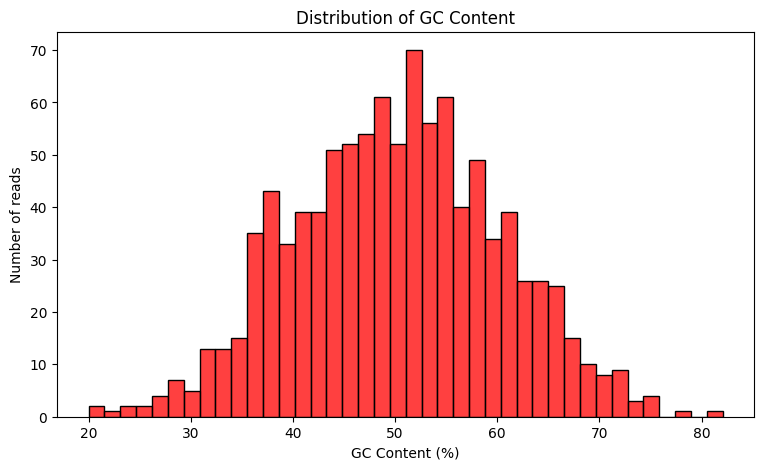

In [6]:
# GC_Content Distribution
plt.figure(figsize=(9,5))
sns.histplot(df["GC_Content"], bins=40, color='red')
plt.title("Distribution of GC Content")
plt.xlabel("GC Content (%)")
plt.ylabel("Number of reads")
plt.show()

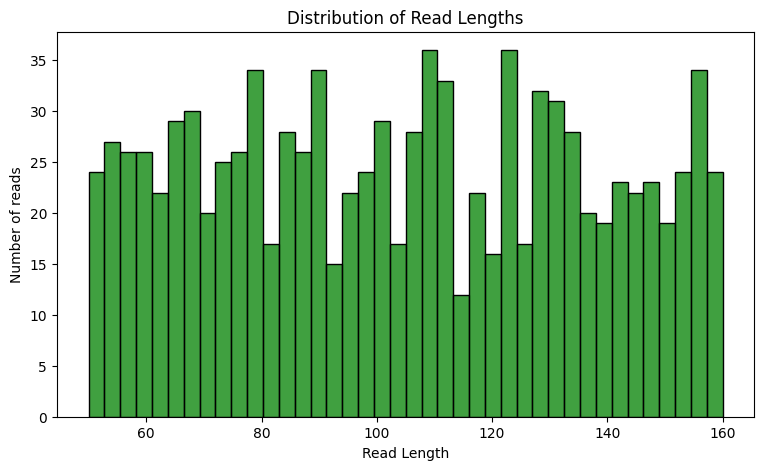

In [7]:
# READ LENGTH DISTRIBUTION 
plt.figure(figsize=(9,5))
sns.histplot(df["Read_Length"], bins=40, color='green')
plt.title("Distribution of Read Lengths")
plt.xlabel("Read Length")
plt.ylabel("Number of reads")
plt.show()

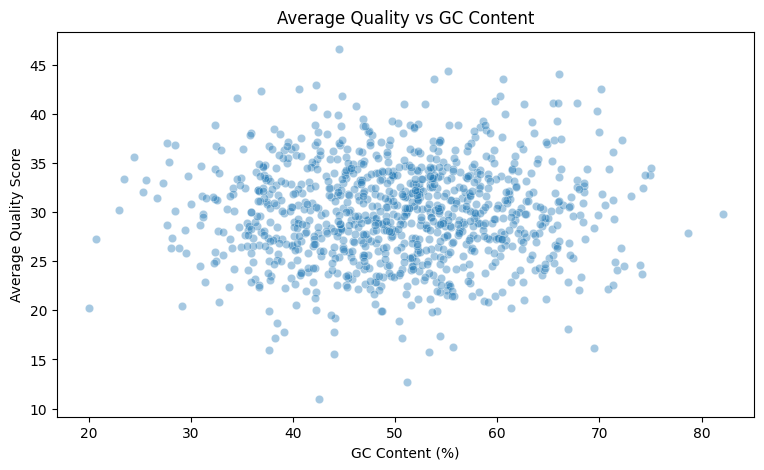

In [8]:
# Quality vs GC Content
plt.figure(figsize=(9,5))
sns.scatterplot(x=df["GC_Content"], y=df["Average_Quality"], alpha=0.4)
plt.title("Average Quality vs GC Content")
plt.xlabel("GC Content (%)")
plt.ylabel("Average Quality Score")
plt.show()

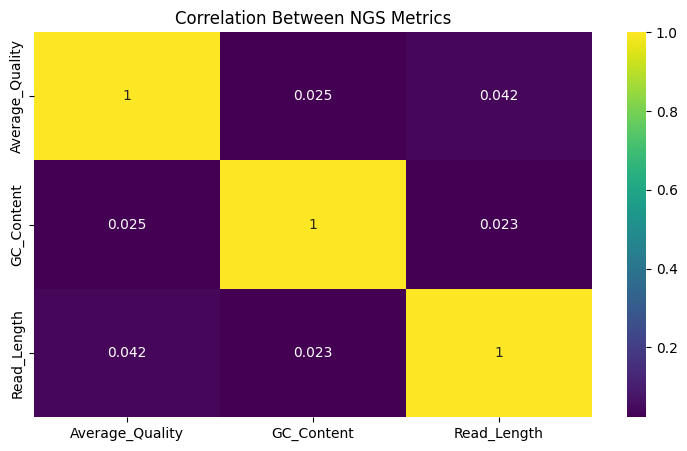

In [9]:
# COORELATION 
plt.figure(figsize=(9,5))
sns.heatmap(df[["Average_Quality", "GC_Content", "Read_Length"]].corr(),annot=True, cmap="viridis")
plt.title("Correlation Between NGS Metrics")
plt.show()


Pass_QC
Pass    756
Fail    244
Name: count, dtype: int64


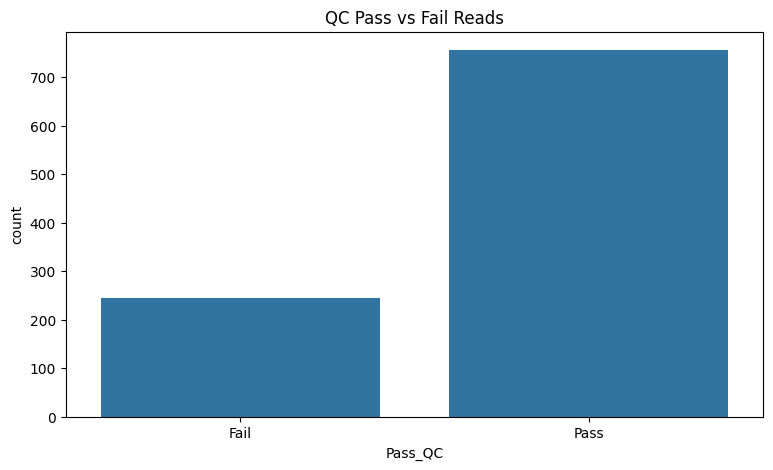

In [10]:
# QC thresholds 
Minimum_Quality = 20
Minimum_Length = 75

df["Pass_QC"]= np.where((df["Average_Quality"]>= Minimum_Quality) & (df["Read_Length"] >= Minimum_Length), "Pass", "Fail")

print(df["Pass_QC"].value_counts())

plt.figure(figsize=(9,5))
sns.countplot(x="Pass_QC", data=df)
plt.title("QC Pass vs Fail Reads")
plt.show()


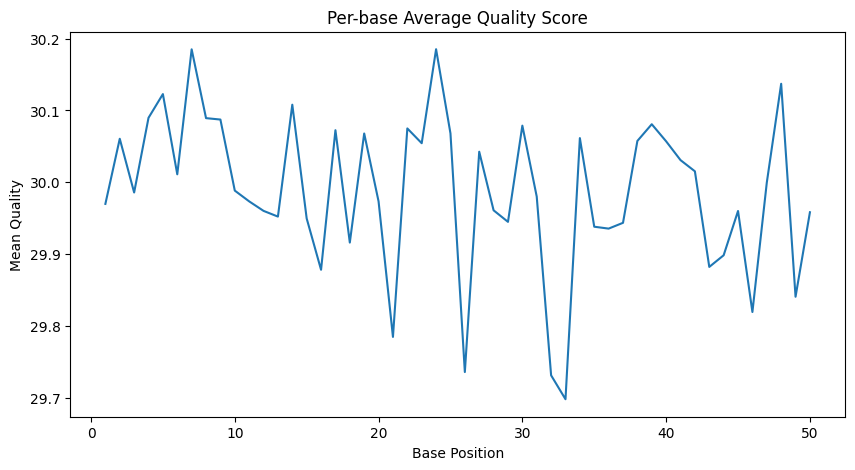

In [12]:
# PER BASE QUALITY SIMULATION 
positions= np.arange(1,51)    # for first 50 bases
per_base_quality= np.random.normal(loc=30, scale=3, size=(len(df), len(positions)))

mean_per_base = per_base_quality.mean(axis=0)

plt.figure(figsize=(10,5))
plt.plot(positions, mean_per_base)
plt.title("Per-base Average Quality Score")
plt.xlabel("Base Position")
plt.ylabel("Mean Quality")
plt.show()


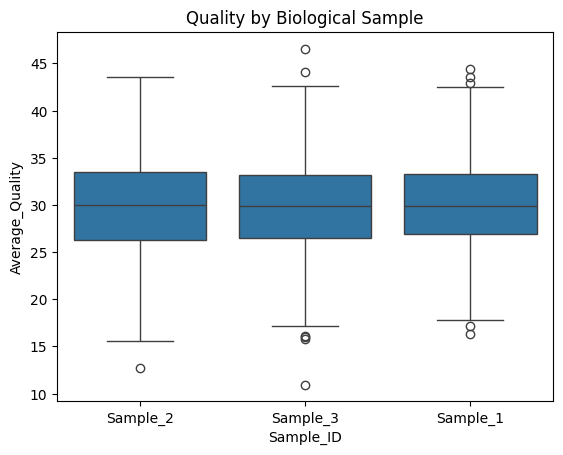

In [ ]:
#SAMPLE RUN ANALYSIS 
df["Sample_ID"] = np.random.choice(["Sample_1","Sample_2","Sample_3"], size=len(df))

sns.boxplot(x="Sample_ID", y="Average_Quality", data=df)
plt.title("Quality by Biological Sample")
plt.show()



In [15]:
qc_summary = pd.DataFrame({
    "Metric": ["Total Reads", "Reads Passing QC", "Reads Failing QC",
               "Mean Quality", "Mean GC Content", "Mean Read Length"],
    "Value": [
        len(df),
        (df["Pass_QC"] == "Pass").sum(),
        (df["Pass_QC"] == "Fail").sum(),
        round(df["Average_Quality"].mean(),2),
        round(df["GC_Content"].mean(),2),
        round(df["Read_Length"].mean(),2)
    ]
})

print(qc_summary)

             Metric    Value
0       Total Reads  1000.00
1  Reads Passing QC   756.00
2  Reads Failing QC   244.00
3      Mean Quality    29.88
4   Mean GC Content    50.18
5  Mean Read Length   104.31
